<a href="https://colab.research.google.com/github/pthomas000/Adv_Data_Analysis/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
import os
!pip install mglearn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [238]:
# Import data
df = pd.read_csv (r'/content/sample_data/data(1).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [239]:
# Assign target
y = df['diagnosis']
print(y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [240]:
# Assign features
X = df[['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean', 'fractal_dimension_mean']]
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  symmetry_mean  fractal_d

In [241]:
feature_names = ['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean', 'fractal_dimension_mean']

In [242]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [243]:
# Explore training set
X_train.info()
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 123 to 396
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             426 non-null    float64
 1   texture_mean            426 non-null    float64
 2   perimeter_mean          426 non-null    float64
 3   area_mean               426 non-null    float64
 4   smoothness_mean         426 non-null    float64
 5   compactness_mean        426 non-null    float64
 6   concavity_mean          426 non-null    float64
 7   symmetry_mean           426 non-null    float64
 8   fractal_dimension_mean  426 non-null    float64
dtypes: float64(9)
memory usage: 33.3 KB


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.104803,19.374085,91.828310,652.611972,0.096246,0.103178,0.088595,0.180612,0.062659
std,3.499300,4.436552,24.232585,351.215880,0.013932,0.052920,0.081193,0.027113,0.006735
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.120300,0.049960
25%,11.752500,16.170000,75.467500,426.850000,0.086462,0.063745,0.028615,0.161725,0.057847
50%,13.290000,18.890000,85.935000,549.050000,0.095865,0.089860,0.059105,0.178600,0.061295
75%,15.690000,21.855000,103.125000,760.625000,0.105250,0.129675,0.132250,0.195550,0.065975
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.290600,0.095020


In [244]:
y_train.describe()

count     426
unique      2
top         B
freq      267
Name: diagnosis, dtype: object

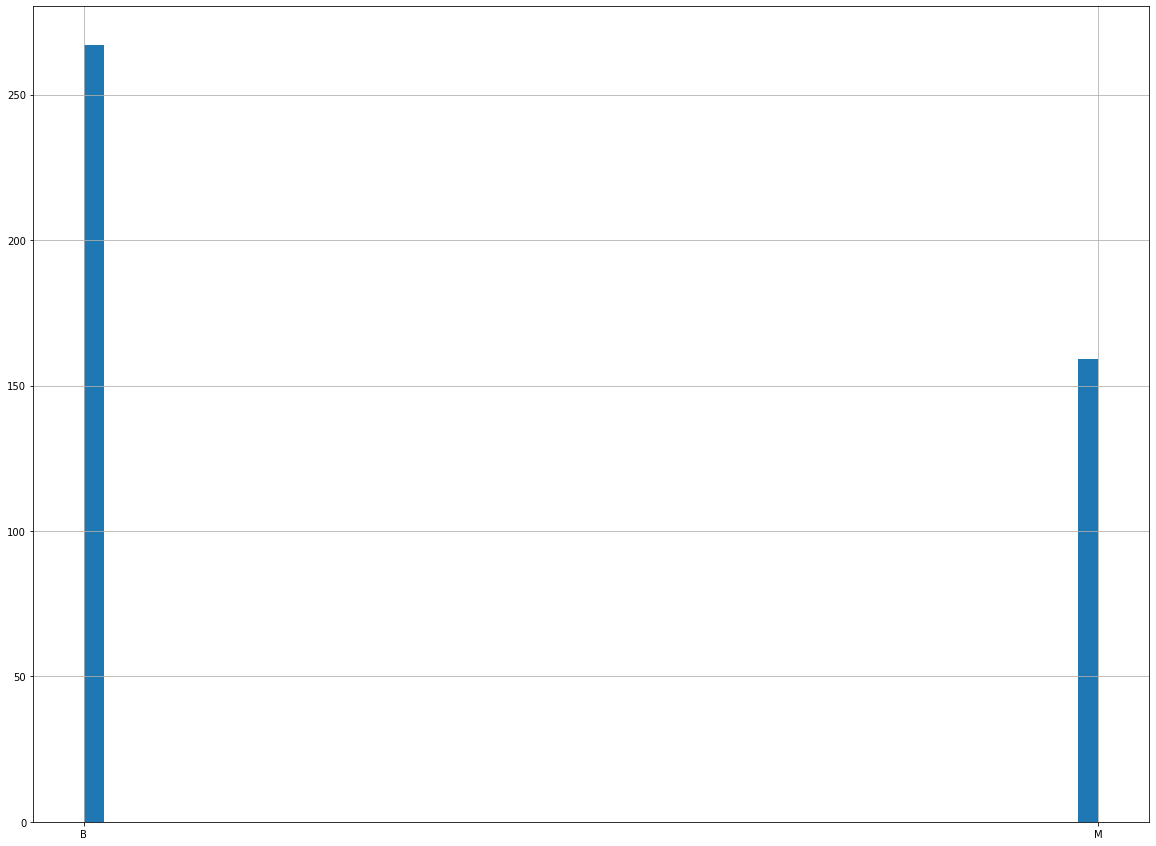

In [245]:
y_train.hist(bins=50, figsize=(20,15)) 
plt.show()

In [246]:
# Data cleaning
df.isnull().values.any()

True

In [247]:
# using the mean method here for missing values
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)
SimpleImputer()
X_train_new = imp_mean.transform(X_train)
X_test_new = imp_mean.transform(X_test)

In [248]:
X_train.isnull().values.any()

False

In [249]:
X_test.isnull().values.any()

False

In [250]:
# K Nearest Neighbor

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [251]:
# k = 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_train, y_train)))

knn score: 0.8943661971830986


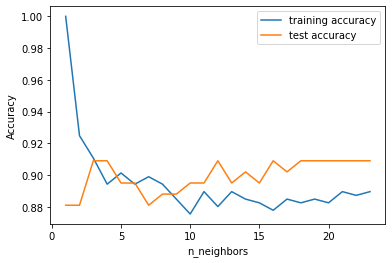

In [252]:
## Euclidian

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 23
neighbors_settings = range(1, 24)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

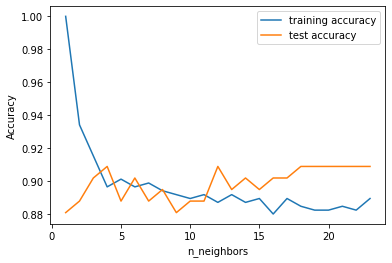

In [253]:
## Manhattan

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 23
neighbors_settings = range(1, 24)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

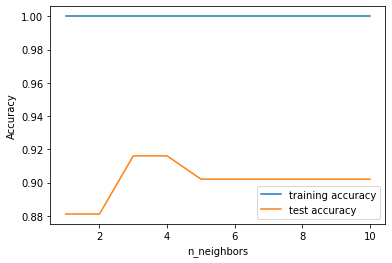

In [254]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,weights='distance')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

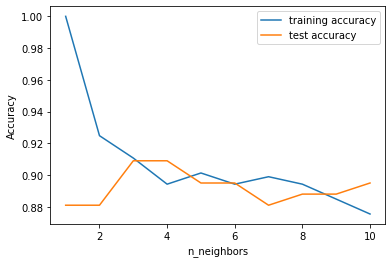

In [255]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm="brute")
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [256]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.91860465 0.83529412 0.87058824 0.85882353 0.89411765]
cv_scores mean:
0.875485636114911


In [257]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

#dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 25)}

#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [258]:
#best performing k (on training set)
knn_gscv.best_params_

{'n_neighbors': 23}

In [259]:
#accuracy of best performing k
knn_gscv.best_score_

0.8872503419972639

In [260]:
# accuracy of k = 4 on testing data 
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_test, y_test)))

knn score: 0.9090909090909091


In [261]:
# accuracy of k = 23 on testing data 
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_test, y_test)))

knn score: 0.9090909090909091


In [262]:
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn4.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[88  2]
 [11 42]]


In [263]:
knn23 = KNeighborsClassifier(n_neighbors=23)
knn23.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn9.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[85  5]
 [11 42]]


In [264]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn4.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.89      0.98      0.93        90
     class 2       0.95      0.79      0.87        53

    accuracy                           0.91       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



In [265]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn9.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.89      0.94      0.91        90
     class 2       0.89      0.79      0.84        53

    accuracy                           0.89       143
   macro avg       0.89      0.87      0.88       143
weighted avg       0.89      0.89      0.89       143



In [266]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 1", "class 2"]))

Accuracy on training set: 1.000
Accuracy on test set: 0.923
              precision    recall  f1-score   support

     class 1       0.99      0.89      0.94        90
     class 2       0.84      0.98      0.90        53

    accuracy                           0.92       143
   macro avg       0.91      0.94      0.92       143
weighted avg       0.93      0.92      0.92       143



In [267]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.10017305 0.07924074 0.02413089 0.07847652 0.08181998 0.
 0.61999192 0.0161669  0.        ]


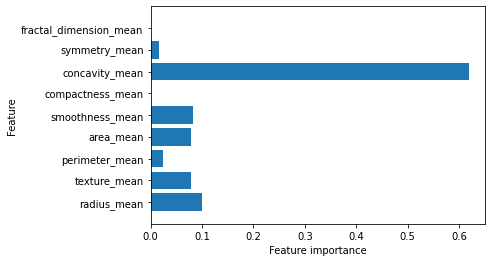

In [268]:
from locale import D_FMT
def plot_feature_importances_df(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_df(tree)

In [269]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 1", "class 2"]))

Accuracy on training set: 0.908
Accuracy on test set: 0.881
              precision    recall  f1-score   support

     class 1       0.99      0.82      0.90        90
     class 2       0.76      0.98      0.86        53

    accuracy                           0.88       143
   macro avg       0.88      0.90      0.88       143
weighted avg       0.90      0.88      0.88       143



In [270]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.10039278 0.         0.         0.10368703 0.         0.
 0.79592019 0.         0.        ]


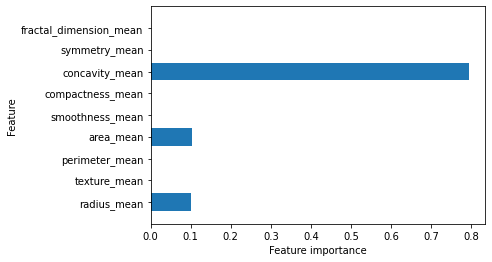

In [271]:
def plot_feature_importances_cancer(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [272]:

#5-fold cross validation
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.91860465 0.83529412 0.87058824 0.85882353 0.89411765]
cv_scores mean:
0.875485636114911


In [273]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.944


In [274]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, max_depth=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.887
Accuracy on test set: 0.909


In [275]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, max_features=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.916


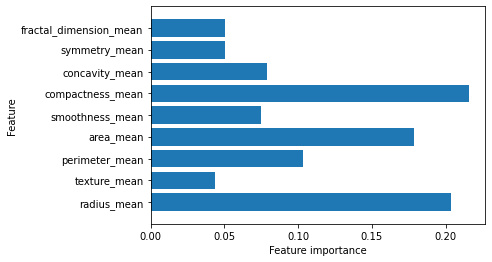

In [276]:
plot_feature_importances_df(forest)

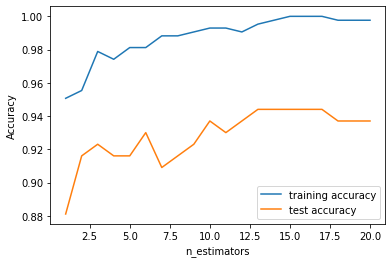

In [277]:
training_accuracy = []
test_accuracy = []
# try n_estimator from 1 to 20
estimator_settings = range(1, 21)

for n_estimators in estimator_settings:
    # build the model
    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=3)
    forest.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest.score(X_test, y_test))
    
plt.plot(estimator_settings, training_accuracy, label="training accuracy")
plt.plot(estimator_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [278]:
rf = RandomForestClassifier()

#dictionary of all values of the estimator in dictionary
param_grid = {"n_estimators": np.arange(1, 25)}

#grid search on all values of the estimator in dictionary
rf_gscv = GridSearchCV(rf, param_grid, cv=5)
rf_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [279]:
rf_gscv.best_params_

{'n_estimators': 14}

In [280]:
rf_gscv.best_score_

0.9483720930232558

In [281]:
forest14 = RandomForestClassifier(n_estimators=14, random_state=3)
forest14.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest14.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest14.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.944


In [282]:
forest1 = RandomForestClassifier(n_estimators=1, random_state=3)
forest1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest1.score(X_test, y_test)))

Accuracy on training set: 0.951
Accuracy on test set: 0.881


In [283]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, forest14.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[83  7]
 [ 1 52]]


In [284]:
forest1 = RandomForestClassifier(n_estimators=1, random_state=3)
forest1.fit(X_train, y_train)

confusion = confusion_matrix(y_test, forest1.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[79 11]
 [ 6 47]]


In [298]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forest14.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.99      0.92      0.95        90
     class 2       0.88      0.98      0.93        53

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [299]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forest1.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.93      0.88      0.90        90
     class 2       0.81      0.89      0.85        53

    accuracy                           0.88       143
   macro avg       0.87      0.88      0.87       143
weighted avg       0.89      0.88      0.88       143



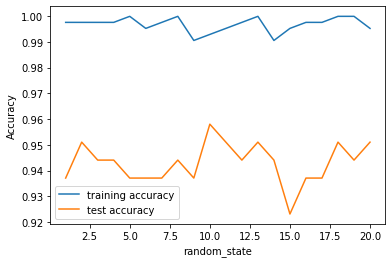

In [285]:
training_accuracy = []
test_accuracy = []
# try random_state from 1 to 20
randomstate_settings = range(1, 21)

for random_state in randomstate_settings:
    # build the model
    forest = RandomForestClassifier(n_estimators=14, random_state=random_state)
    forest.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest.score(X_test, y_test))
    
plt.plot(randomstate_settings, training_accuracy, label="training accuracy")
plt.plot(randomstate_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("random_state")
plt.legend()

In [286]:
#dictionary of all values of random_state
param_grid2 = {"random_state": np.arange(1, 25)}

#grid search on all values of k in dictionary
rf_gscv2 = GridSearchCV(rf, param_grid2, cv=5)
rf_gscv2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [287]:
rf_gscv2.best_params_

{'random_state': 3}

In [288]:
rf_gscv2.best_score_

0.9460191518467852

In [289]:
forest3 = RandomForestClassifier(n_estimators=14, random_state=3)
forest3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest3.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.944


In [290]:
forest15 = RandomForestClassifier(n_estimators=1, random_state=15)
forest15.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest15.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest15.score(X_test, y_test)))

Accuracy on training set: 0.972
Accuracy on test set: 0.860


In [291]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, forest3.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[83  7]
 [ 1 52]]


In [295]:
confusion = confusion_matrix(y_test, forest15.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[75 15]
 [ 5 48]]


In [296]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forest3.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.99      0.92      0.95        90
     class 2       0.88      0.98      0.93        53

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [297]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forest15.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.94      0.83      0.88        90
     class 2       0.76      0.91      0.83        53

    accuracy                           0.86       143
   macro avg       0.85      0.87      0.85       143
weighted avg       0.87      0.86      0.86       143

